In [1]:
import pandas as pd
pd.set_option('max_colwidth', 70)
%matplotlib inline

In [2]:
uniswap_events = pd.read_pickle('uniswap_events.pickle')
uniswap_events.head()

,transactionHash,transaction_index,transaction_sender,address,data,topics,block_timestamp,blockNumber_dec,contract,event,contract_event,block_group,agent,eth_delta,token_delta,uni_delta,eth_balance,token_balance,UNI_supply,invariant
0,0xbd773ccc33c831378f2aa2b7d4a9ae8a20ed9112ea9acb86ce96aa674c0cb5f9,150,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0x06239653922ac7bea6aa2b19dc486b9361821d37712eb796adfd38d81de278c...,2018-11-02 10:27:36+00:00,6629139,DAI,AddLiquidity,DAIAddLiquidity,662,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,30000000000000000000,5900000000000000000000,0,30000000000000000000,5900000000000000000000,0,177000000000000000000000000000000000000000
1,0xbd773ccc33c831378f2aa2b7d4a9ae8a20ed9112ea9acb86ce96aa674c0cb5f9,150,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x000000000000000000000000000000000000000000000001a055690d9db80000,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3e...,2018-11-02 10:27:36+00:00,6629139,DAI,Transfer,DAITransfer,662,0x0000000000000000000000000000000000000000,0,0,30000000000000000000,30000000000000000000,5900000000000000000000,30000000000000000000,177000000000000000000000000000000000000000
2,0xd53f01fc0cabbf4083da93a023ddb81de91320027077849ac982f7bc04b49279,97,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0x7f4091b46c33e918a0f3aa42307641d17bb67029427a5369e54b35398423870...,2018-11-02 10:33:56+00:00,6629171,DAI,EthPurchase,DAIEthPurchase,662,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,-25326059253325791,5000000000000000000,0,29974673940746674209,5905000000000000000000,30000000000000000000,177000449620109111204145000000000000000000
3,0x53172898dbe437c784f7e4ac757087b28d1b06aa6b72b81d4a6bb2bead50c93e,53,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0x7f4091b46c33e918a0f3aa42307641d17bb67029427a5369e54b35398423870...,2018-11-02 10:35:47+00:00,6629177,DAI,EthPurchase,DAIEthPurchase,662,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,-10118429075406013,2000000000000000000,0,29964555511671268196,5907000000000000000000,30000000000000000000,177000629407442181233772000000000000000000
4,0x6cef57fd37d7a2602c1236ff080c61c37e10980c7e3bd66de6f4e0ed52f16011,24,0x11e4857bb9993a50c685a79afad4e6f65d518dda,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0xcd60aa75dea3072fbc07ae6d7d856b5dc5f4eee88854f5b4abf7b680ef8bc50...,2018-11-02 10:38:18+00:00,6629190,DAI,TokenPurchase,DAITokenPurchase,662,0x11e4857bb9993a50c685a79afad4e6f65d518dda,10000000000000000,-1964761376358359468,0,29974555511671268196,5905035238623641640532,30000000000000000000,177000806558499339943044863018842396120272


In [3]:
state = {
    'XXX_balance': int(5900000000000000000000),
    'ETH_balance': int(30000000000000000000) # initial liquidity pool: 500 ETH + 100.000 DAI
}
# state['ETH_balance'] = state['XXX_balance'] * state['market_price_XXXETH']
state['UNI_supply'] = state['ETH_balance']
state

{'XXX_balance': 5900000000000000000000,
 'ETH_balance': 30000000000000000000,
 'UNI_supply': 30000000000000000000}

In [4]:
params = {
    'fee_factor': 997,
    'fee_base': 1000
}
params

{'fee_factor': 997, 'fee_base': 1000}

In [5]:
# def addLiquidity(min_liquidity: uint256, max_tokens: uint256, deadline: timestamp) -> uint256:
#     assert deadline > block.timestamp and (max_tokens > 0 and msg.value > 0)
#     total_liquidity: uint256 = self.totalSupply
#     if total_liquidity > 0:
#         assert min_liquidity > 0
#         eth_reserve: uint256(wei) = self.balance - msg.value
#         token_reserve: uint256 = self.token.balanceOf(self)
#         token_amount: uint256 = msg.value * token_reserve / eth_reserve + 1
#         liquidity_minted: uint256 = msg.value * total_liquidity / eth_reserve
#         assert max_tokens >= token_amount and liquidity_minted >= min_liquidity
#         self.balances[msg.sender] += liquidity_minted
#         self.totalSupply = total_liquidity + liquidity_minted
#         assert self.token.transferFrom(msg.sender, self, token_amount)
#         log.AddLiquidity(msg.sender, msg.value, token_amount)
#         log.Transfer(ZERO_ADDRESS, msg.sender, liquidity_minted)
#         return liquidity_minted

def addLiquidity_UNI(params, step, history, current_state, input_):
    total_liquidity = int(current_state['UNI_supply'])
    eth_reserve = int(current_state['ETH_balance'])
    liquidity_minted = int(input_['eth_deposit'] * total_liquidity // eth_reserve)
    return ('UNI_supply', total_liquidity + liquidity_minted)

def addLiquidity_ETH(params, step, history, current_state, input_):
    eth_reserve = int(current_state['ETH_balance'])
    return ('ETH_balance', eth_reserve + input_['eth_deposit'])

def addLiquidity_XXX(params, step, history, current_state, input_):
    eth_reserve = int(current_state['ETH_balance'])
    token_reserve = int(current_state['XXX_balance'])
    if input_['eth_deposit'] == 0:
        token_amount = 0
    else:
        token_amount = int(input_['eth_deposit'] * token_reserve // eth_reserve + 1)
    return ('XXX_balance', token_reserve + token_amount)

In [6]:
# def removeLiquidity(amount: uint256, min_eth: uint256(wei), min_tokens: uint256, deadline: timestamp) -> (uint256(wei), uint256):
#     assert (amount > 0 and deadline > block.timestamp) and (min_eth > 0 and min_tokens > 0)
#     total_liquidity: uint256 = self.totalSupply
#     assert total_liquidity > 0
#     token_reserve: uint256 = self.token.balanceOf(self)
#     eth_amount: uint256(wei) = amount * self.balance / total_liquidity
#     token_amount: uint256 = amount * token_reserve / total_liquidity
#     assert eth_amount >= min_eth and token_amount >= min_tokens
#     self.balances[msg.sender] -= amount
#     self.totalSupply = total_liquidity - amount
#     send(msg.sender, eth_amount)
#     assert self.token.transfer(msg.sender, token_amount)
#     log.RemoveLiquidity(msg.sender, eth_amount, token_amount)
#     log.Transfer(msg.sender, ZERO_ADDRESS, amount)
#     return eth_amount, token_amount

def removeLiquidity_UNI(params, step, history, current_state, input_):
    total_liquidity = int(current_state['UNI_supply'])
    amount = int(input_['UNI_burn'])
    return ('UNI_supply', int(total_liquidity - amount))

def removeLiquidity_ETH(params, step, history, current_state, input_):
    total_liquidity = int(current_state['UNI_supply'])
    eth_reserve = int(current_state['ETH_balance'])
    amount = int(input_['UNI_burn'])
    eth_amount = int(amount * eth_reserve // total_liquidity)
    return ('ETH_balance', int(eth_reserve - eth_amount))

def removeLiquidity_XXX(params, step, history, current_state, input_):
    total_liquidity = int(current_state['UNI_supply'])
    token_reserve = int(current_state['XXX_balance'])
    amount = int(input_['UNI_burn'])
    token_amount = int(amount * token_reserve // total_liquidity)
    return ('XXX_balance', int(token_reserve - token_amount))

In [7]:
# @dev Pricing function for converting between ETH and Tokens.
# @param input_amount Amount of ETH or Tokens being sold.
# @param input_reserve Amount of ETH or Tokens (input type) in exchange reserves.
# @param output_reserve Amount of ETH or Tokens (output type) in exchange reserves.
# @return Amount of ETH or Tokens bought.
def getInputPrice(input_amount, input_reserve, output_reserve, params):
    fee_factor = params['fee_factor']
    fee_base = params['fee_base']
    input_amount_with_fee = input_amount * fee_factor
    numerator = input_amount_with_fee * output_reserve
    denominator = (input_reserve * fee_base) + input_amount_with_fee
    return int(numerator // denominator)

# @dev Pricing function for converting between ETH and Tokens.
# @param output_amount Amount of ETH or Tokens being bought.
# @param input_reserve Amount of ETH or Tokens (input type) in exchange reserves.
# @param output_reserve Amount of ETH or Tokens (output type) in exchange reserves.
# @return Amount of ETH or Tokens sold.
def getOutputPrice(output_amount, input_reserve, output_reserve, params):
    fee_factor = params['fee_factor']
    fee_base = params['fee_base']
    numerator = input_reserve * output_amount * fee_base
    denominator = (output_reserve - output_amount) * fee_factor
    return int(numerator // denominator + 1)

In [8]:
# @private
# def ethToTokenInput(eth_sold: uint256(wei), min_tokens: uint256, deadline: timestamp, buyer: address, recipient: address) -> uint256:
#     assert deadline >= block.timestamp and (eth_sold > 0 and min_tokens > 0)
#     token_reserve: uint256 = self.token.balanceOf(self)
#     tokens_bought: uint256 = self.getInputPrice(as_unitless_number(eth_sold), as_unitless_number(self.balance - eth_sold), token_reserve)
#     assert tokens_bought >= min_tokens
#     assert self.token.transfer(recipient, tokens_bought)
#     log.TokenPurchase(buyer, eth_sold, tokens_bought)
#     return tokens_bought

def ethToToken_ETH(params, step, history, current_state, input_):
    eth_sold = int(input_['eth_sold']) #amount of ETH being sold by the user
    eth_reserve = int(current_state['ETH_balance'])
    return ('ETH_balance', eth_reserve + eth_sold)

def ethToToken_XXX(params, step, history, current_state, input_):
    eth_sold = int(input_['eth_sold']) #amount of ETH being sold by the user
    eth_reserve = int(current_state['ETH_balance'])
    token_reserve = int(current_state['XXX_balance'])
    if eth_sold == 0:
        return ('XXX_balance', token_reserve)
    else:
        tokens_bought = int(getInputPrice(eth_sold, eth_reserve, token_reserve, params))
        return ('XXX_balance', token_reserve - tokens_bought)

In [9]:
# @private
# def ethToTokenOutput(tokens_bought: uint256, max_eth: uint256(wei), deadline: timestamp, buyer: address, recipient: address) -> uint256(wei):
#     assert deadline >= block.timestamp and (tokens_bought > 0 and max_eth > 0)
#     token_reserve: uint256 = self.token.balanceOf(self)
#     eth_sold: uint256 = self.getOutputPrice(tokens_bought, as_unitless_number(self.balance - max_eth), token_reserve)
#     # Throws if eth_sold > max_eth
#     eth_refund: uint256(wei) = max_eth - as_wei_value(eth_sold, 'wei')
#     if eth_refund > 0:
#         send(buyer, eth_refund)
#     assert self.token.transfer(recipient, tokens_bought)
#     log.TokenPurchase(buyer, as_wei_value(eth_sold, 'wei'), tokens_bought)
#     return as_wei_value(eth_sold, 'wei')

def ethToTokenOutput_ETH(params, step, history, current_state, input_):
    tokens_bought = int(input_['tokens_bought'])
    token_reserve = int(current_state['XXX_balance'])
    eth_reserve = int(current_state['ETH_balance'])
    eth_sold = int(getOutputPrice(tokens_bought, eth_reserve, token_reserve))
    eth_sold = int(eth_sold)
    return ('ETH_balance', eth_reserve + eth_sold)

def ethToTokenOutput_XXX(params, step, history, current_state, input_):
    tokens_bought = int(input_['tokens_bought'])
    token_reserve = int(current_state['XXX_balance'])
    return ('XXX_balance', token_reserve - tokens_bought)

In [10]:
# @private
# def tokenToEthInput(tokens_sold: uint256, min_eth: uint256(wei), deadline: timestamp, buyer: address, recipient: address) -> uint256(wei):
#     assert deadline >= block.timestamp and (tokens_sold > 0 and min_eth > 0)
#     token_reserve: uint256 = self.token.balanceOf(self)
#     eth_bought: uint256 = self.getInputPrice(tokens_sold, token_reserve, as_unitless_number(self.balance))
#     wei_bought: uint256(wei) = as_wei_value(eth_bought, 'wei')
#     assert wei_bought >= min_eth
#     send(recipient, wei_bought)
#     assert self.token.transferFrom(buyer, self, tokens_sold)
#     log.EthPurchase(buyer, tokens_sold, wei_bought)
#     return wei_bought

def tokenToEth_ETH(params, step, history, current_state, input_):
    tokens_sold = int(input_['tokens_sold']) #amount of tokens being sold by the user
    eth_reserve = int(current_state['ETH_balance'])
    if tokens_sold == 0:
        return ('ETH_balance', eth_reserve)
    else:
        token_reserve = int(current_state['XXX_balance'])
        eth_bought = int(getInputPrice(tokens_sold, token_reserve, eth_reserve, params))
        return ('ETH_balance', eth_reserve - eth_bought)
    
def tokenToEth_XXX(params, step, history, current_state, input_):
    tokens_sold = int(input_['tokens_sold']) #amount of tokens being sold by the user
    token_reserve = int(current_state['XXX_balance'])
    return ('XXX_balance', token_reserve + tokens_sold)

In [11]:
# @private
# def tokenToEthOutput(eth_bought: uint256(wei), max_tokens: uint256, deadline: timestamp, buyer: address, recipient: address) -> uint256:
#     assert deadline >= block.timestamp and eth_bought > 0
#     token_reserve: uint256 = self.token.balanceOf(self)
#     tokens_sold: uint256 = self.getOutputPrice(as_unitless_number(eth_bought), token_reserve, as_unitless_number(self.balance))
#     # tokens sold is always > 0
#     assert max_tokens >= tokens_sold
#     send(recipient, eth_bought)
#     assert self.token.transferFrom(buyer, self, tokens_sold)
#     log.EthPurchase(buyer, tokens_sold, eth_bought)
#     return tokens_sold

def tokenToEthOutput_ETH(params, step, history, current_state, input_):
#     token_reserve: uint256 = self.token.balanceOf(self)
#     tokens_sold: uint256 = self.getOutputPrice(as_unitless_number(eth_bought), token_reserve, as_unitless_number(self.balance))
#     # tokens sold is always > 0
#     assert max_tokens >= tokens_sold
#     send(recipient, eth_bought)
#     assert self.token.transferFrom(buyer, self, tokens_sold)
#     log.EthPurchase(buyer, tokens_sold, eth_bought)
#     return tokens_sold
    eth_bought = int(input_['eth_bought'])
    eth_reserve = int(current_state['ETH_balance'])
    return ('ETH_balance', eth_reserve - eth_bought)
    
def tokenToEthOutput_XXX(params, step, history, current_state, input_):
    eth_bought = int(input_['eth_bought'])
    token_reserve = int(current_state['XXX_balance'])
    eth_reserve = int(current_state['ETH_balance'])
    tokens_sold = int(getOutputPrice(eth_bought, token_reserve, eth_reserve))
    return ('XXX_balance', token_reserve + tokens_sold)

In [12]:
def actionTracker(params, step, history, current_state):
    prev_timestep = current_state['timestep']
    if step > 1:
        prev_timestep -= 1
    data_counter = prev_timestep + 2
    
    action = {
        'eth_sold': 0,
        'tokens_sold': 0,
        'eth_deposit': 0,
        'UNI_burn': 0,        
    }
    
    event = uniswap_events['event'][data_counter]
    
    if event == 'TokenPurchase':
        action['eth_sold'] = uniswap_events['eth_delta'][data_counter]
    elif event == 'EthPurchase':
        action['tokens_sold'] = uniswap_events['token_delta'][data_counter]
    elif event == 'AddLiquidity':
        action['eth_deposit'] = uniswap_events['eth_delta'][data_counter]
    elif event == 'Transfer':
        UNI_delta = uniswap_events['uni_delta'][data_counter]
        if UNI_delta < 0:
            action['UNI_burn'] = -UNI_delta
            
    return action

In [13]:
PSUBs = [
    {
        'policies': {
            'EthPurchase': actionTracker
        },
        'variables': {
            'XXX_balance': tokenToEth_XXX,
            'ETH_balance': tokenToEth_ETH
        }
    },
    {
        'policies': {
            'TokenPurchase': actionTracker
        },
        'variables': {
            'XXX_balance': ethToToken_XXX,
            'ETH_balance': ethToToken_ETH
        }
    },
    {
        'policies': {
            'AddLiquidity': actionTracker
        },
        'variables': {
            'XXX_balance': addLiquidity_XXX,
            'ETH_balance': addLiquidity_ETH,
            'UNI_supply': addLiquidity_UNI,
        }
    },
    {
        'policies': {
            'RemoveLiquidity': actionTracker
        },
        'variables': {
            'XXX_balance': removeLiquidity_XXX,
            'ETH_balance': removeLiquidity_ETH,
            'UNI_supply': removeLiquidity_UNI
        }
    },
]


In [14]:
simulation_parameters = {
    'T': range(len(uniswap_events)-2),
    'N': 1,
    'M': params
}

In [15]:
from cadCAD.configuration import Configuration
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# The configurations above are then packaged into a `Configuration` object
config = Configuration(initial_state=state, #dict containing variable names and initial values
                       partial_state_update_blocks=PSUBs, #dict containing state update functions
                       sim_config=simulation_parameters #dict containing simulation parameters
                      )

from cadCAD.engine import ExecutionMode, ExecutionContext, Executor
exec_mode = ExecutionMode()
exec_context = ExecutionContext(exec_mode.multi_proc)
executor = Executor(exec_context, [config])
raw_result, tensor = executor.execute()[0]

df = pd.DataFrame(raw_result)


                            __________   ____ 
          ________ __ _____/ ____/   |  / __ \
         / ___/ __` / __  / /   / /| | / / / /
        / /__/ /_/ / /_/ / /___/ ___ |/ /_/ / 
        \___/\__,_/\__,_/\____/_/  |_/_____/  
        by BlockScience
        
Execution Mode: multi_proc: [<cadCAD.configuration.Configuration object at 0x10da00b70>]
Configurations: [<cadCAD.configuration.Configuration object at 0x10da00b70>]


In [16]:
model_history = df[(df['substep']==4)|(df['substep']==0)].reset_index(drop=True)
model_history = model_history[['XXX_balance', 'ETH_balance', 'UNI_supply']]

In [17]:
real_history = uniswap_events.iloc[1:][['token_balance','eth_balance','UNI_supply']].reset_index(drop=True)
real_history.columns = ['XXX_balance', 'ETH_balance', 'UNI_supply']

In [18]:
model_history

,XXX_balance,ETH_balance,UNI_supply
0,5900000000000000000000,30000000000000000000,30000000000000000000
1,5905000000000000000000,29974673940746674209,30000000000000000000
2,5907000000000000000000,29964555511671268196,30000000000000000000
3,5905035238623641640532,29974555511671268196,30000000000000000000
4,5903071785798411448958,29984555511671268196,30000000000000000000
...,...,...,...
2087,53668842439223779946934,371865734365773177477,312764489717089182212
2088,53806925577067049452310,370914281817892901976,312764489717089182212
2089,53419236962665300503396,373614281817892901976,312764489717089182212
2090,53009014518991520914898,376514281817892901976,312764489717089182212


In [19]:
real_history

,XXX_balance,ETH_balance,UNI_supply
0,5900000000000000000000,30000000000000000000,30000000000000000000
1,5905000000000000000000,29974673940746674209,30000000000000000000
2,5907000000000000000000,29964555511671268196,30000000000000000000
3,5905035238623641640532,29974555511671268196,30000000000000000000
4,5903071785798411448958,29984555511671268196,30000000000000000000
...,...,...,...
2087,53668842439223779948941,371865734365773177490,312764489717089182146
2088,53806925577067049454317,370914281817892901989,312764489717089182146
2089,53419236962665300505402,373614281817892901989,312764489717089182146
2090,53009014518991520916903,376514281817892901989,312764489717089182146


In [20]:
uniswap_events.head(10)

,transactionHash,transaction_index,transaction_sender,address,data,topics,block_timestamp,blockNumber_dec,contract,event,contract_event,block_group,agent,eth_delta,token_delta,uni_delta,eth_balance,token_balance,UNI_supply,invariant
0,0xbd773ccc33c831378f2aa2b7d4a9ae8a20ed9112ea9acb86ce96aa674c0cb5f9,150,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0x06239653922ac7bea6aa2b19dc486b9361821d37712eb796adfd38d81de278c...,2018-11-02 10:27:36+00:00,6629139,DAI,AddLiquidity,DAIAddLiquidity,662,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,30000000000000000000,5900000000000000000000,0,30000000000000000000,5900000000000000000000,0,177000000000000000000000000000000000000000
1,0xbd773ccc33c831378f2aa2b7d4a9ae8a20ed9112ea9acb86ce96aa674c0cb5f9,150,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x000000000000000000000000000000000000000000000001a055690d9db80000,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3e...,2018-11-02 10:27:36+00:00,6629139,DAI,Transfer,DAITransfer,662,0x0000000000000000000000000000000000000000,0,0,30000000000000000000,30000000000000000000,5900000000000000000000,30000000000000000000,177000000000000000000000000000000000000000
2,0xd53f01fc0cabbf4083da93a023ddb81de91320027077849ac982f7bc04b49279,97,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0x7f4091b46c33e918a0f3aa42307641d17bb67029427a5369e54b35398423870...,2018-11-02 10:33:56+00:00,6629171,DAI,EthPurchase,DAIEthPurchase,662,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,-25326059253325791,5000000000000000000,0,29974673940746674209,5905000000000000000000,30000000000000000000,177000449620109111204145000000000000000000
3,0x53172898dbe437c784f7e4ac757087b28d1b06aa6b72b81d4a6bb2bead50c93e,53,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0x7f4091b46c33e918a0f3aa42307641d17bb67029427a5369e54b35398423870...,2018-11-02 10:35:47+00:00,6629177,DAI,EthPurchase,DAIEthPurchase,662,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,-10118429075406013,2000000000000000000,0,29964555511671268196,5907000000000000000000,30000000000000000000,177000629407442181233772000000000000000000
4,0x6cef57fd37d7a2602c1236ff080c61c37e10980c7e3bd66de6f4e0ed52f16011,24,0x11e4857bb9993a50c685a79afad4e6f65d518dda,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0xcd60aa75dea3072fbc07ae6d7d856b5dc5f4eee88854f5b4abf7b680ef8bc50...,2018-11-02 10:38:18+00:00,6629190,DAI,TokenPurchase,DAITokenPurchase,662,0x11e4857bb9993a50c685a79afad4e6f65d518dda,10000000000000000,-1964761376358359468,0,29974555511671268196,5905035238623641640532,30000000000000000000,177000806558499339943044863018842396120272
5,0x13d958222cbec3f6ae93e8f73af0f6ce800541db27a048258ac0645fc37e627e,281,0x11e4857bb9993a50c685a79afad4e6f65d518dda,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0xcd60aa75dea3072fbc07ae6d7d856b5dc5f4eee88854f5b4abf7b680ef8bc50...,2018-11-02 10:39:55+00:00,6629198,DAI,TokenPurchase,DAITokenPurchase,662,0x11e4857bb9993a50c685a79afad4e6f65d518dda,10000000000000000,-1963452825230191574,0,29984555511671268196,5903071785798411448958,30000000000000000000,177000983650652913895410492180545782739768
6,0x51f662378a5e158bece87f19c5537fe69805e7163fe409f782000a66b0a44582,121,0x4defa30195094963cfac7285d8d6e6e523c7f90d,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0xcd60aa75dea3072fbc07ae6d7d856b5dc5f4eee88854f5b4abf7b680ef8bc50...,2018-11-02 11:02:14+00:00,6629301,DAI,TokenPurchase,DAITokenPurchase,662,0x4defa30195094963cfac7285d8d6e6e523c7f90d,10000000000000000,-1962145581583193733,0,29994555511671268196,5901109640216828255225,30000000000000000000,177001160683942120400286097646701713324100
7,0x31f62df00bd7be033d6e4c959dfc7f596c2ec0902cda9d87c3b9c35a032b817d,51,0x4defa30195094963cfac7285d8d6e6e523c7f90d,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0x06239653922ac7bea6aa2b19dc486b9361821d37712eb796adfd38d81de278c...,2018-11-02 11:04:09+00:00,6629306,DAI,AddLiqui

In [21]:
model_history.head(10)

,XXX_balance,ETH_balance,UNI_supply
0,5900000000000000000000,30000000000000000000,30000000000000000000
1,5905000000000000000000,29974673940746674209,30000000000000000000
2,5907000000000000000000,29964555511671268196,30000000000000000000
3,5905035238623641640532,29974555511671268196,30000000000000000000
4,5903071785798411448958,29984555511671268196,30000000000000000000
5,5901109640216828255225,29994555511671268196,30000000000000000000
6,5903009630907380568837,30004212911671268196,30009659152971520629
7,5903009630907380568837,30004212911671268196,30009659152971520629
8,5896674516410174307748,30036545047335992753,30009659152971520629
9,5890366480352677927710,30068808190051867458,30009659152971520629


In [22]:
model_history.join(real_history, rsuffix='_real')[~((model_history == real_history).all(axis=1))].head(20)

,XXX_balance,ETH_balance,UNI_supply,XXX_balance_real,ETH_balance_real,UNI_supply_real
6,5903009630907380568837,30004212911671268196,30009659152971520629,5903009630907380568837,30004212911671268196,30000000000000000000
19,5793296021394740637814,30580533255533713504,30009659152971520629,5793296021394740637902,30580533255533713504,30009659152971520629
20,5792296021394740637667,30585828660118521443,30009659152971520629,5792296021394740637902,30585828660118521443,30009659152971520629
21,5791296021394740637483,30591125896200656791,30009659152971520629,5791296021394740637902,30591125896200656791,30009659152971520629
22,5790296021394740637351,30596424964729985148,30009659152971520629,5790296021394740637902,30596424964729985148,30009659152971520629
23,5780296021394740637243,30649516519768775713,30009659152971520629,5780296021394740637902,30649516519768775713,30009659152971520629
24,5755296021394740637243,30783053272833797995,30009659152971520629,5755296021394740637902,30783053272833797995,30009659152971520629
25,5710296021394740637189,31026369137530514371,30009659152971520629,5710296021394740637902,31026369137530514371,30009659152971520629
26,5660296021394740637088,31301264021162677015,30009659152971520629,5660296021394740637902,31301264021162677015,30009659152971520629
27,5665296021394740637088,31273721380196372205,30009659152971520629,5665296021394740637902,31273721380196372205,30009659152971520629


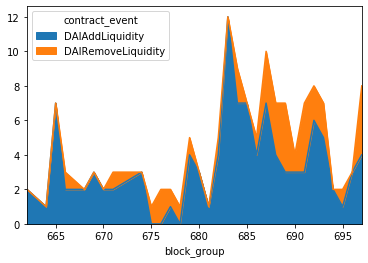

In [37]:
areaplot = uniswap_events[uniswap_events['contract_event'].isin(['DAIAddLiquidity','DAIRemoveLiquidity'])].groupby(['block_group','contract_event']).transactionHash.count().reset_index().pivot(index='block_group', columns='contract_event', values='transactionHash')#.plot.area()
areaplot.plot.area()

In [30]:
~((model_history == real_history).all(axis=1)).head(30)

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
dtype: bool

In [25]:
uniswap_events[['event','eth_delta','token_delta','eth_balance','token_balance']].iloc[19:21]

,event,eth_delta,token_delta,eth_balance,token_balance
19,EthPurchase,-782736453965123998,150000000000000000000,30060094696479600291,5893296021394740637902
20,TokenPurchase,520438559054113213,-100000000000000000000,30580533255533713504,5793296021394740637902


In [28]:
getInputPrice(uniswap_events.iloc[20].eth_delta, 
              uniswap_events.iloc[19].eth_balance,
              uniswap_events.iloc[19].token_balance,
              params) == -uniswap_events.iloc[20].token_delta

False

In [29]:
getOutputPrice(-uniswap_events.iloc[20].token_delta,
               uniswap_events.iloc[19].eth_balance,
               uniswap_events.iloc[19].token_balance,
               params) == uniswap_events.iloc[20].eth_delta

True

In [ ]:
functions = {
 '0x422f1043': 'addLiquidity(uint256,uint256,uint256)',
 '0xf88bf15a': 'removeLiquidity(uint256,uint256,uint256,uint256)',
 '0xf39b5b9b': 'ethToTokenSwapInput(uint256,uint256)',
 '0xad65d76d': 'ethToTokenTransferInput(uint256,uint256,address)',
 '0x6b1d4db7': 'ethToTokenSwapOutput(uint256,uint256)',
 '0x0b573638': 'ethToTokenTransferOutput(uint256,uint256,address)',
 '0x95e3c50b': 'tokenToEthSwapInput(uint256,uint256,uint256)',
 '0x7237e031': 'tokenToEthTransferInput(uint256,uint256,uint256,address)',
 '0x013efd8b': 'tokenToEthSwapOutput(uint256,uint256,uint256)',
 '0xd4e4841d': 'tokenToEthTransferOutput(uint256,uint256,uint256,address)',
 '0xddf7e1a7': 'tokenToTokenSwapInput(uint256,uint256,uint256,uint256,address)',
 '0xf552d91b': 'tokenToTokenTransferInput(uint256,uint256,uint256,uint256,address,address)',
 '0xb040d545': 'tokenToTokenSwapOutput(uint256,uint256,uint256,uint256,address)',
 '0xf3c0efe9': 'tokenToTokenTransferOutput(uint256,uint256,uint256,uint256,address,address)',
 '0xb1cb43bf': 'tokenToExchangeSwapInput(uint256,uint256,uint256,uint256,address)',
 '0xec384a3e': 'tokenToExchangeTransferInput(uint256,uint256,uint256,uint256,address,address)',
 '0xea650c7d': 'tokenToExchangeSwapOutput(uint256,uint256,uint256,uint256,address)',
 '0x981a1327': 'tokenToExchangeTransferOutput(uint256,uint256,uint256,uint256,address,address)',
}

In [ ]:
uniswap_calls = pd.read_pickle('uniswap_calls.pickle')

In [ ]:
uniswap_calls.groupby(['status','error']).size()

In [ ]:
uniswap_calls[uniswap_calls['status']==0]['error'].sort_values()#).size()

In [ ]:
uniswap_calls.iloc[1907]

In [ ]:
uniswap_calls['function'] = uniswap_calls['input'].apply(lambda x: functions[x[:10]])

In [ ]:
uniswap_calls.head()

In [ ]:
uniswap_calls['relevant_call_param'] = uniswap_calls['input'].apply(lambda x: int("0x"+x[10:74],16))

In [ ]:
functions_that_take_msgvalue_as_param = [
    'addLiquidity(uint256,uint256,uint256)',
    'ethToTokenSwapInput(uint256,uint256)',
    'ethToTokenTransferInput(uint256,uint256,address)',
    'tokenToEthSwapOutput(uint256,uint256,uint256)',
    'tokenToEthTransferOutput(uint256,uint256,uint256,address)'
]

In [ ]:
uniswap_calls.loc[uniswap_calls['function'].isin(functions_that_take_msgvalue_as_param),'relevant_call_param'] = \
    uniswap_calls['value']

In [ ]:
uniswap_calls.head()

In [ ]:
def actionTracker(params, step, history, current_state):
    prev_timestep = current_state['timestep']
    if step > 1:
        prev_timestep -= 1
    data_counter = prev_timestep + 2
    
    action = {
        'function': uniswap_calls['function'][data_counter],
        'param': uniswap_calls['relevant_call_param'][data_counter]
    }
            
    return action

In [ ]:
def mechanismHub_ETH(params, step, history, current_state, input_):
    return ('ETH_balance', result)

def mechanismHub_XXX(params, step, history, current_state, input_):
    return ('XXX_balance', result)

def mechanismHub_UNI(params, step, history, current_state, input_):
    return ('UNI_supply', result)

In [ ]:
ETH_multiplexer = {
    'addLiquidity(uint256,uint256,uint256)': addLiquidity_ETH,
    'removeLiquidity(uint256,uint256,uint256,uint256)': removeLiquidity_ETH,
    'ethToTokenSwapInput(uint256,uint256)': ethToToken_ETH,
    'ethToTokenTransferInput(uint256,uint256,address)': ethToToken_ETH,
    'ethToTokenSwapOutput(uint256,uint256)' ethToTokenOutput_ETH,
    'ethToTokenTransferOutput(uint256,uint256,address)': ethToTokenOutput_ETH,
    'tokenToEthSwapInput(uint256,uint256,uint256)': tokenToEth_ETH,
    'tokenToEthTransferInput(uint256,uint256,uint256,address)': tokenToEth_ETH,
    'tokenToEthSwapOutput(uint256,uint256,uint256)': tokenToEthOutput_ETH,
    'tokenToEthTransferOutput(uint256,uint256,uint256,address)': tokenToEthOutput_ETH,
    'tokenToTokenSwapInput(uint256,uint256,uint256,uint256,address)',
    'tokenToTokenTransferInput(uint256,uint256,uint256,uint256,address,address)',
    'tokenToTokenSwapOutput(uint256,uint256,uint256,uint256,address)',
    'tokenToTokenTransferOutput(uint256,uint256,uint256,uint256,address,address)',
    'tokenToExchangeSwapInput(uint256,uint256,uint256,uint256,address)',
    'tokenToExchangeTransferInput(uint256,uint256,uint256,uint256,address,address)',
    'tokenToExchangeSwapOutput(uint256,uint256,uint256,uint256,address)',
    'tokenToExchangeTransferOutput(uint256,uint256,uint256,uint256,address,address)',
}

In [ ]:
uniswap_calls.groupby('function').size()

In [ ]:
a = uniswap_calls[uniswap_calls['function']=='tokenToTokenSwapOutput(uint256,uint256,uint256,uint256,address)']['input']

In [ ]:
a

In [ ]:
a.apply(lambda x: x[-40:]).describe()